In [60]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [76]:
df = pd.read_csv(Path('JNorth_Adult_Site.csv'))
df.head()

C:\conda\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species
0,0,850841703,1996-12-16,Monarch Adult Sighted,1,27.594,-81.362,0,On the ballfield a solitary monarch butterfly ...,Walker memorial junior academy,10.0,-999999.999,135,-999999.999,1,Monarch Butterfly,1
1,1,851824801,1996-12-06,Monarch Adult Sighted,1,30.420,-87.224,0,Our 5th grade Discovery students who went alon...,Hambrick elementary school,5.0,-999999.999,150,-999999.999,1,Monarch Butterfly,1
2,2,854409931,1996-09-21,Monarch Adult Sighted,1,40.817,-96.710,0,We saw several hundred monarchs in our school ...,-999999.999,5.0,-999999.999,9701054,-999999.999,1,Monarch Butterfly,1
3,3,854557206,1996-09-21,Monarch Adult Sighted,1,40.817,-96.710,0,Over a hundered monarchs in our school butterf...,Fredstrom elementary school,6.0,-999999.999,175,-999999.999,1,Monarch Butterfly,1
4,4,855061862,1997-01-01,Monarch Adult Sighted,1,34.244,-77.946,0,"I Thought I Saw It, But I Was Suprised To See ...",Gregory,3.0,-999999.999,181,-999999.999,1,Monarch Butterfly,1


In [77]:
# adding a column for year
df['year'] = pd.DatetimeIndex(df['sighting_date']).year
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year
0,0,850841703,1996-12-16,Monarch Adult Sighted,1,27.594,-81.362,0,On the ballfield a solitary monarch butterfly ...,Walker memorial junior academy,10.0,-999999.999,135,-999999.999,1,Monarch Butterfly,1,1996
1,1,851824801,1996-12-06,Monarch Adult Sighted,1,30.420,-87.224,0,Our 5th grade Discovery students who went alon...,Hambrick elementary school,5.0,-999999.999,150,-999999.999,1,Monarch Butterfly,1,1996
2,2,854409931,1996-09-21,Monarch Adult Sighted,1,40.817,-96.710,0,We saw several hundred monarchs in our school ...,-999999.999,5.0,-999999.999,9701054,-999999.999,1,Monarch Butterfly,1,1996
3,3,854557206,1996-09-21,Monarch Adult Sighted,1,40.817,-96.710,0,Over a hundered monarchs in our school butterf...,Fredstrom elementary school,6.0,-999999.999,175,-999999.999,1,Monarch Butterfly,1,1996
4,4,855061862,1997-01-01,Monarch Adult Sighted,1,34.244,-77.946,0,"I Thought I Saw It, But I Was Suprised To See ...",Gregory,3.0,-999999.999,181,-999999.999,1,Monarch Butterfly,1,1997


In [78]:
# Adding a column for month

df['month'] = pd.DatetimeIndex(df['sighting_date']).month
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month
0,0,850841703,1996-12-16,Monarch Adult Sighted,1,27.594,-81.362,0,On the ballfield a solitary monarch butterfly ...,Walker memorial junior academy,10.0,-999999.999,135,-999999.999,1,Monarch Butterfly,1,1996,12
1,1,851824801,1996-12-06,Monarch Adult Sighted,1,30.420,-87.224,0,Our 5th grade Discovery students who went alon...,Hambrick elementary school,5.0,-999999.999,150,-999999.999,1,Monarch Butterfly,1,1996,12
2,2,854409931,1996-09-21,Monarch Adult Sighted,1,40.817,-96.710,0,We saw several hundred monarchs in our school ...,-999999.999,5.0,-999999.999,9701054,-999999.999,1,Monarch Butterfly,1,1996,9
3,3,854557206,1996-09-21,Monarch Adult Sighted,1,40.817,-96.710,0,Over a hundered monarchs in our school butterf...,Fredstrom elementary school,6.0,-999999.999,175,-999999.999,1,Monarch Butterfly,1,1996,9
4,4,855061862,1997-01-01,Monarch Adult Sighted,1,34.244,-77.946,0,"I Thought I Saw It, But I Was Suprised To See ...",Gregory,3.0,-999999.999,181,-999999.999,1,Monarch Butterfly,1,1997,1


In [85]:
# combining the year and month
df['month_and_year'] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month,month_and_year
0,0,850841703,1996-12-16,Monarch Adult Sighted,1,27.594,-81.362,0,On the ballfield a solitary monarch butterfly ...,Walker memorial junior academy,10.0,-999999.999,135,-999999.999,1,Monarch Butterfly,1,1996,12,1996-12-01
1,1,851824801,1996-12-06,Monarch Adult Sighted,1,30.420,-87.224,0,Our 5th grade Discovery students who went alon...,Hambrick elementary school,5.0,-999999.999,150,-999999.999,1,Monarch Butterfly,1,1996,12,1996-12-01
2,2,854409931,1996-09-21,Monarch Adult Sighted,1,40.817,-96.710,0,We saw several hundred monarchs in our school ...,-999999.999,5.0,-999999.999,9701054,-999999.999,1,Monarch Butterfly,1,1996,9,1996-09-01
3,3,854557206,1996-09-21,Monarch Adult Sighted,1,40.817,-96.710,0,Over a hundered monarchs in our school butterf...,Fredstrom elementary school,6.0,-999999.999,175,-999999.999,1,Monarch Butterfly,1,1996,9,1996-09-01
4,4,855061862,1997-01-01,Monarch Adult Sighted,1,34.244,-77.946,0,"I Thought I Saw It, But I Was Suprised To See ...",Gregory,3.0,-999999.999,181,-999999.999,1,Monarch Butterfly,1,1997,1,1997-01-01


In [90]:
# grouping by month and assuring month isn't an index
counts = df.groupby(["month_and_year"]).count()
counts = counts.reset_index()
counts.head(200)

,month_and_year,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month
0,1996-03-01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1996-06-01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1996-09-01,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,1996-12-01,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,1997-01-01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2020-08-01,3381,3381,3381,3381,3381,3381,3381,3381,3381,3381,3381,3381,3381,3381,3381,3381,3381,3381,3381
195,2020-09-01,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351,3351
196,2020-10-01,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428
197,2020-11-01,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500


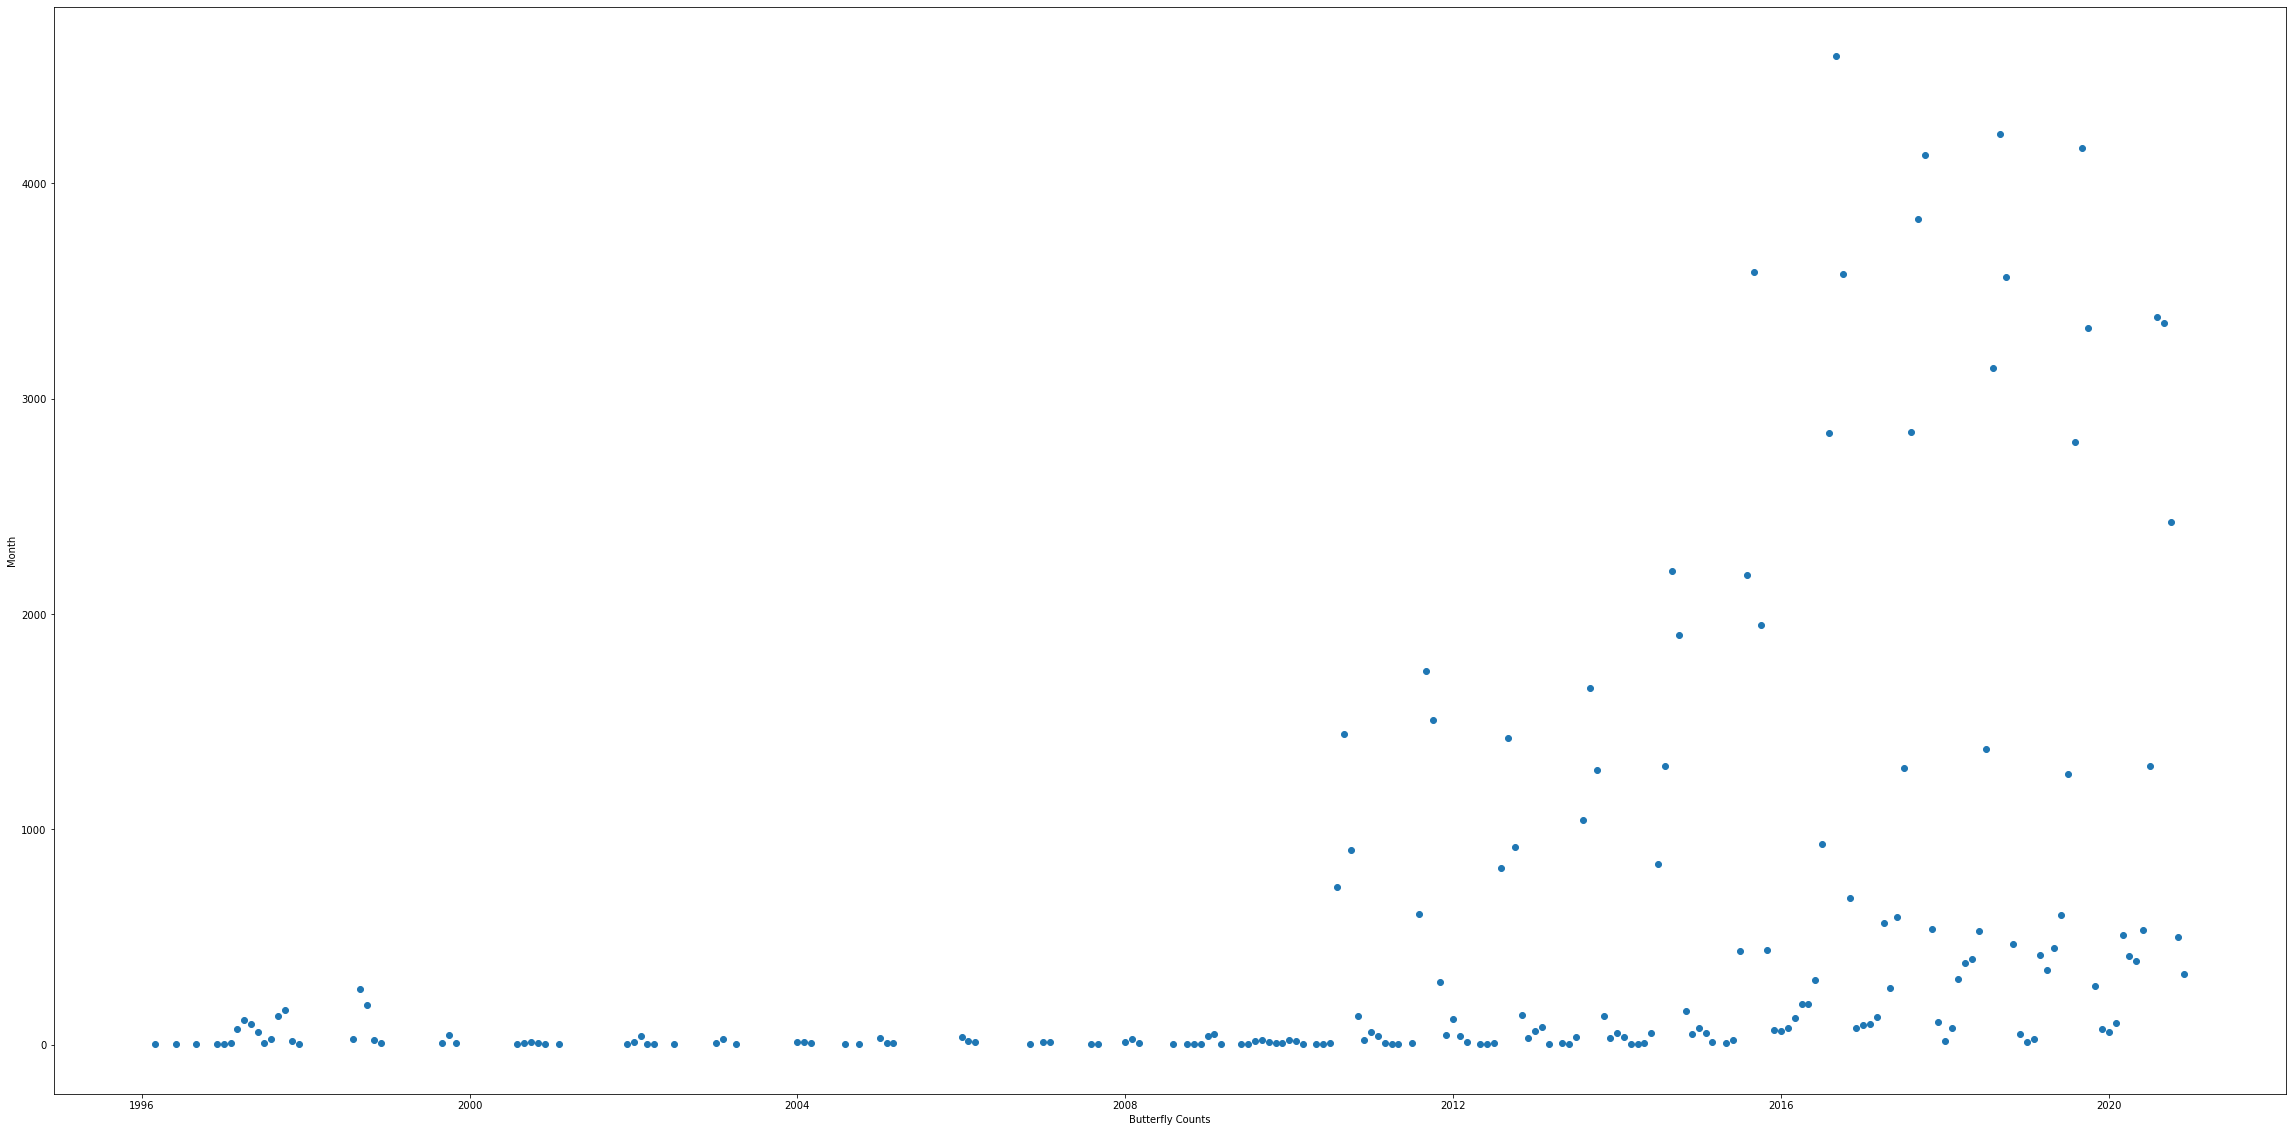

In [100]:
# initial graph. note y-axis with counts.Date is a COUNT of total dates grouped by month; it is not the actual date
fig = plt.figure(figsize=(40, 20))
plt.scatter(counts.month_and_year, counts.sighting_date)
plt.xlabel('Butterfly Counts')
plt.ylabel('Month')

plt.show()

In [101]:
# using reshape
X = counts.month.values.reshape(-1, 1)

In [102]:
# setting the y axis as the count of dates
y = counts.Date

AttributeError: 'DataFrame' object has no attribute 'Date'

In [94]:
# setting the model
model = LinearRegression()

In [69]:
# fitting the model
model.fit(X, y)

LinearRegression()

In [70]:
# number of predictions
y_pred = model.predict(X)
print(y_pred.shape)

(6,)


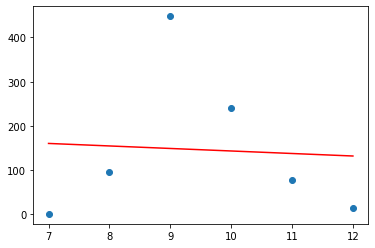

In [71]:
# a straight line for linear regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [72]:
# creating a polynomial function that allows us to input degrees for fitting
def fit_and_plot_poly_deg(degree):
    poly_feat = PolynomialFeatures(degree)
    X_poly = poly_feat.fit_transform(X)
    
    print('X_poly shape is: {}'.format(str(X_poly.shape)))

    poly_model = LinearRegression().fit(X_poly, y)
    y_pred = poly_model.predict(X_poly)

    plt.scatter(X, y, zorder=3)
    plt.plot(X, y_pred, color='black');

X_poly shape is: (6, 3)


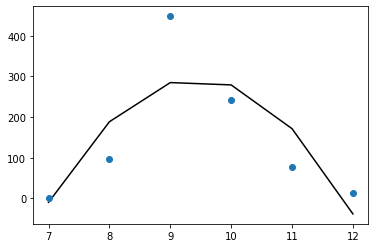

In [73]:
# two degree fit
fit_and_plot_poly_deg(2)

X_poly shape is: (6, 4)


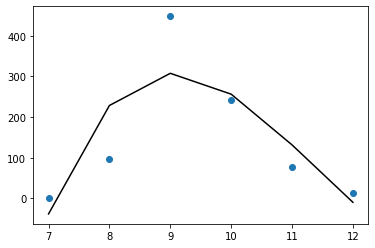

In [74]:
# 3rd degree fit
fit_and_plot_poly_deg(3)

X_poly shape is: (6, 5)


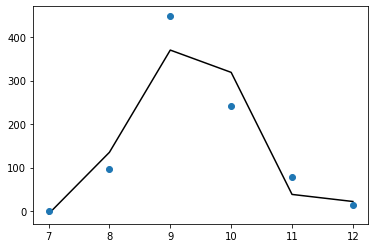

In [75]:
# 4th degree
fit_and_plot_poly_deg(4)